In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [ ]:
zipcode = '97035'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [289]:
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn
count,162,162,162.00,162.00,162.00,162.00,162,162.00,162,162,162,162,162,162
unique,162,162,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No
freq,1,1,NaN,NaN,NaN,NaN,90,NaN,104,92,160,106,123,157
mean,NaN,NaN,928361.01,3.06,2.39,2115.49,NaN,1980.22,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1177256.89,1.10,0.99,1321.64,NaN,18.29,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,150000.00,1.00,1.00,600.00,NaN,1920.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,332500.00,2.00,2.00,1178.50,NaN,1970.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,632844.50,3.00,2.50,1742.50,NaN,1979.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,949750.00,4.00,2.50,2706.75,NaN,1988.00,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
df['log_price'] = np.log(df['price'])

In [291]:
df.isnull().sum()

Address                0
link                   0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
has_hoa                0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
log_price              0
dtype: int64

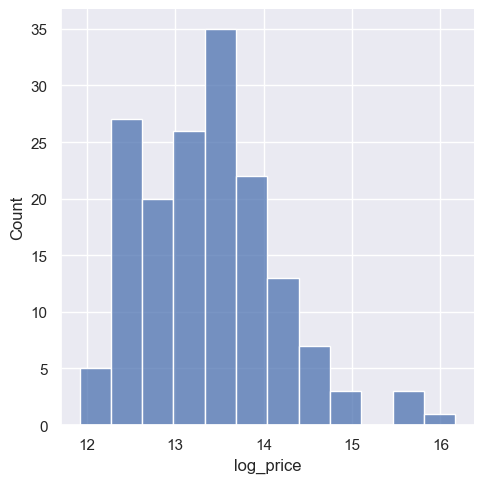

In [292]:
ax=sns.displot(df['log_price'])

In [293]:
q = df['log_price'].quantile(0.95)
df = df[df['log_price']<q]

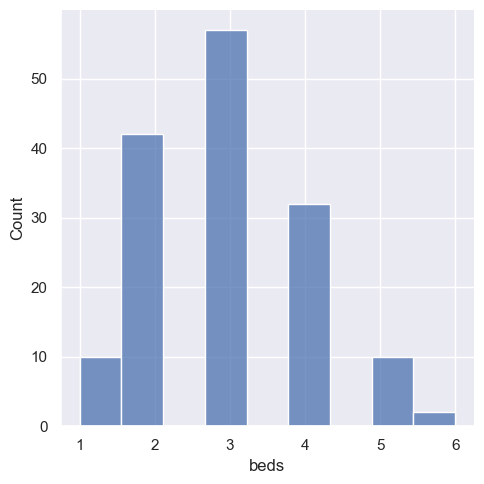

In [294]:
ax=sns.displot(df['beds'])

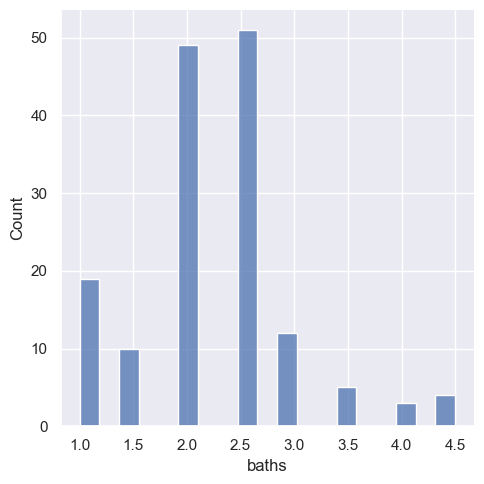

In [295]:
ax=sns.displot(df['baths'])

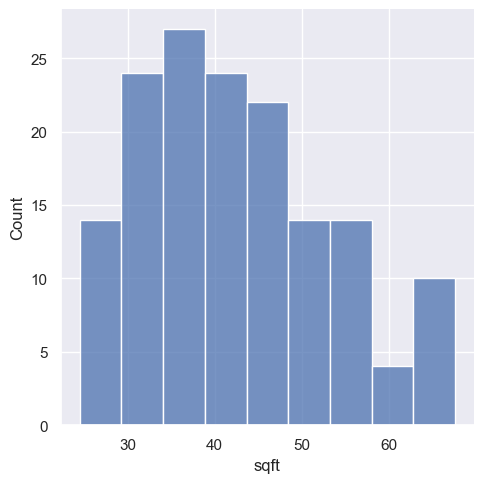

In [296]:
ax=sns.displot(np.sqrt(df['sqft']))

In [297]:
df['sqft'] = np.sqrt(df['sqft'])

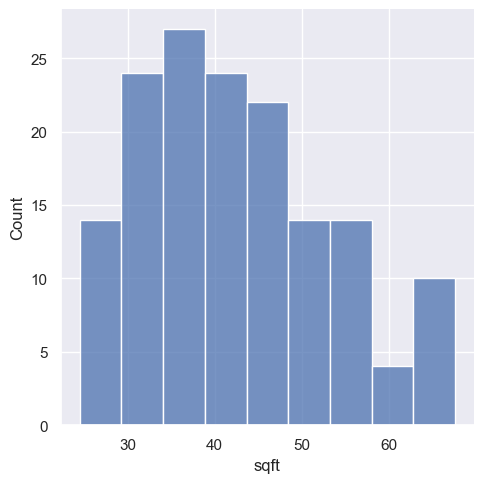

In [298]:
ax=sns.displot(df['sqft'])

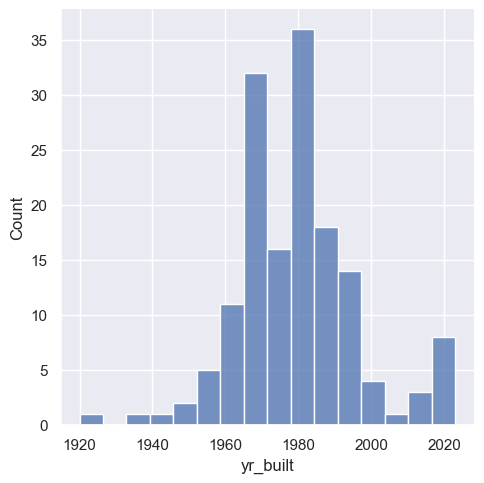

In [299]:
ax=sns.displot(df['yr_built'])

In [300]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [301]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn,log_price
count,151,151,151.00,151.00,151.00,151.00,151,151.00,151,151,151,151,151,151,151.00
unique,151,151,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No,NaN
freq,1,1,NaN,NaN,NaN,NaN,83,NaN,94,89,149,95,112,149,NaN
mean,NaN,NaN,704904.82,2.97,2.24,42.32,NaN,1979.89,NaN,NaN,NaN,NaN,NaN,NaN,13.27
std,NaN,NaN,444419.77,1.07,0.75,10.78,NaN,15.44,NaN,NaN,NaN,NaN,NaN,NaN,0.63
min,NaN,NaN,150000.00,1.00,1.00,24.49,NaN,1941.00,NaN,NaN,NaN,NaN,NaN,NaN,11.92
25%,NaN,NaN,324000.00,2.00,2.00,33.98,NaN,1970.00,NaN,NaN,NaN,NaN,NaN,NaN,12.69
50%,NaN,NaN,612094.00,3.00,2.00,40.24,NaN,1979.00,NaN,NaN,NaN,NaN,NaN,NaN,13.32
75%,NaN,NaN,892500.00,4.00,2.50,49.30,NaN,1988.00,NaN,NaN,NaN,NaN,NaN,NaN,13.70


## Checking OLS Assumptions

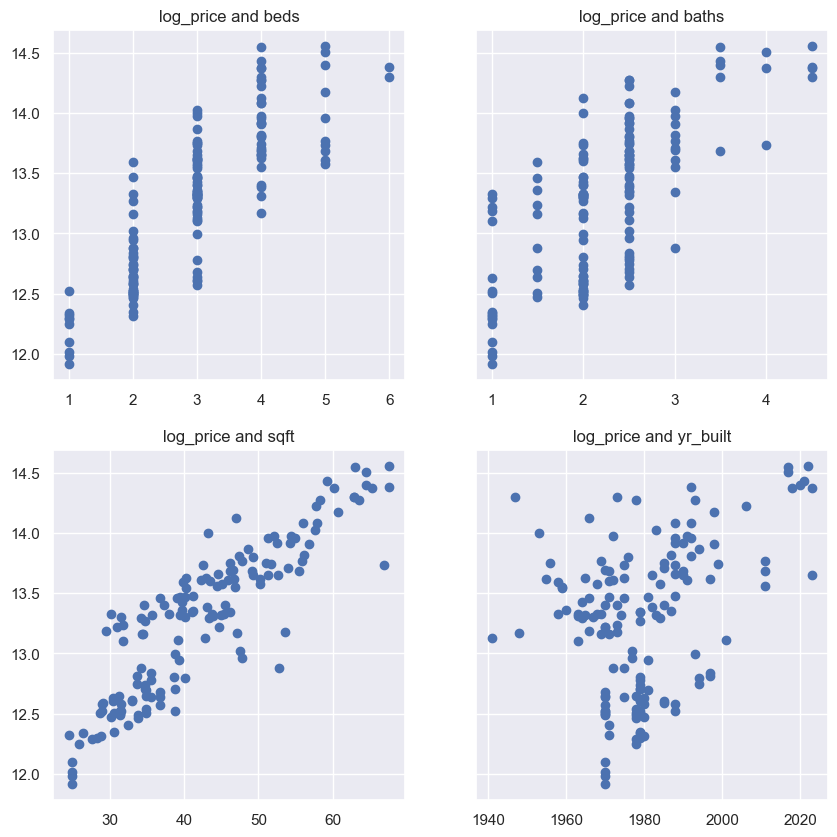

In [463]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['log_price'])
ax1.set_title('log_price and beds')
ax2.scatter(df['baths'], df['log_price'])
ax2.set_title('log_price and baths')
ax3.scatter(df['sqft'], df['log_price'])
ax3.set_title('log_price and sqft')
ax4.scatter(df['yr_built'], df['log_price'])
ax4.set_title('log_price and yr_built')

plt.show()

## Create Dummy variables

In [303]:
# Reorder columns
columns = ['Address', 'link', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]
cleaned_df = df[columns]

In [304]:
df = pd.get_dummies(df, columns=df.columns[8:], drop_first=True)

In [305]:
df.head()

,Address,link,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,senior_community_yn_Yes,style_Single Family Residential,county_Multnomah County,new_construction_yn_Yes,has_hoa_Yes
0,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,2099000,14.56,5,4.50,67.59,2022,1,1,0,1,0,1,1
1,3569 Sunwood Ct,https://www.redfin.com/OR/Lake-Oswego/3569-Sun...,700000,13.46,3,1.50,36.74,1966,0,0,0,1,0,0,0
2,6338 Washington Ct,https://www.redfin.com/OR/Lake-Oswego/6338-Was...,800000,13.59,2,1.50,39.85,1958,1,1,0,1,0,0,0
3,4672 Winthrop Ct,https://www.redfin.com/OR/Lake-Oswego/4672-Win...,1790000,14.40,5,3.50,64.51,2020,0,1,0,1,0,0,1
4,16900 Gassner Ln,https://www.redfin.com/OR/Lake-Oswego/16900-Ga...,1622500,14.30,4,3.50,62.87,1973,0,1,0,1,0,0,0


## Checking for multicollinearity

In [399]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[[ 'sqft', 'beds', 'yr_built', 'cooling_yn_Yes', 'style_Single Family Residential', 'county_Multnomah County', 'has_hoa_Yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [400]:
vif

,VIF,features
0,29.75,sqft
1,21.51,yr_built
2,3.53,cooling_yn_Yes
3,6.23,style_Single Family Residential
4,1.68,county_Multnomah County
5,3.35,has_hoa_Yes


## Linear Regression Model

In [413]:
targets = df['log_price']
inputs = df.drop(['Address', 'link', 'price', 'baths', 'log_price', 'senior_community_yn_Yes', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [414]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [415]:
inputs_scaled = scaler.transform(inputs)

In [416]:
inputs_scaled

array([[ 1.89933925,  2.3517414 ,  2.73602021, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796, -0.51860951, -0.90282642, ...,  0.7677719 ,
        -0.59009684, -1.1981168 ],
       [-0.91242768, -0.22944263, -1.42266166, ...,  0.7677719 ,
        -0.59009684, -1.1981168 ],
       ...,
       [-0.91242768, -0.70075187, -0.05809417, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796,  1.04582844, -0.44797059, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796,  0.08530072, -1.74755868, ...,  0.7677719 ,
        -0.59009684,  0.83464317]])

### Train Test Split

In [443]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=0)

### Ridge Regression

In [444]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5.0)
ridge.fit(x_train, y_train)

Ridge(alpha=5.0)

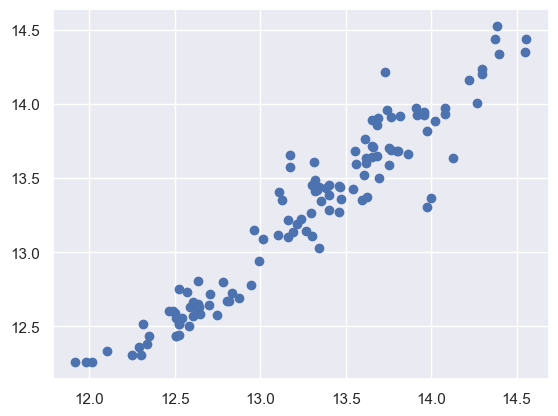

In [445]:
y_hat = ridge.predict(x_train)
plt.scatter(y_train, y_hat)

Text(0.5, 1.0, 'Residuals PDF')

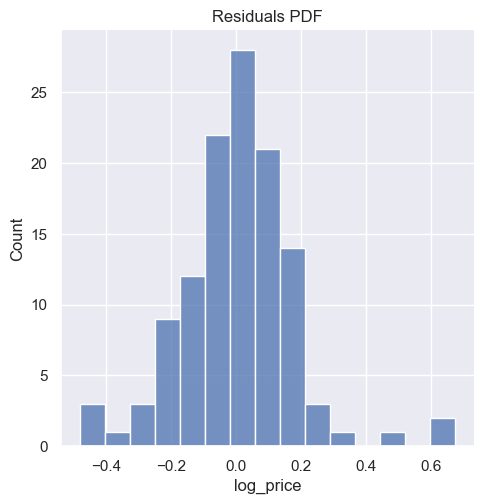

In [446]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [447]:
ridge.score(x_train, y_train)

0.9195154298386132

In [448]:
ridge.score(x_test, y_test)

0.9584352834363679

In [449]:
def adj_r2(x,y):
    r2 = ridge.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [450]:
adj_r2(x_train, y_train)

0.9144851442035266

In [451]:
adj_r2(x_test, y_test)

0.9457851523083058

In [452]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = (np.exp(ridge.coef_ / scaler.scale_) - 1) * 100

In [453]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [454]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,6.35,266.98,0.00
1,sqft,2.97,445.16,0.00
2,yr_built,0.34,12.40,0.00
3,cooling_yn_Yes,7.85,24.84,0.00
4,style_Single Family Residential,52.63,241.44,0.00
5,county_Multnomah County,-8.07,15.22,0.00
6,has_hoa_Yes,-12.23,12.78,0.00


In [455]:
y_hat_test = ridge.predict(x_test)

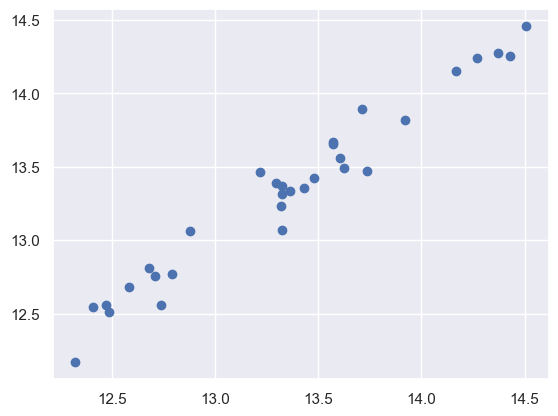

In [456]:
plt.scatter(y_test, y_hat_test)

In [457]:
df_pf = pd.DataFrame(y_hat_test, columns=['log_predictions'])
df_pf['predictions'] = np.exp(y_hat_test)

In [458]:
y_test = y_test.reset_index(drop=True)
df_pf['log_target'] = y_test
df_pf['target'] = np.exp(y_test)
df_pf

,log_predictions,predictions,log_target,target
0,13.89,1081139.46,13.71,900000.00
1,14.27,1576497.36,14.37,1745000.00
2,12.54,279645.30,12.41,244900.00
3,12.75,345671.81,12.71,330000.00
4,13.82,1000599.20,13.92,1109000.00
5,13.66,851814.97,13.57,785000.00
6,13.56,774816.20,13.60,810000.00
7,13.47,709130.46,13.74,924229.00
8,13.31,605446.38,13.32,612000.00
9,12.81,365218.11,12.68,321000.00


In [459]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = (df_pf['residual']/df_pf['target']*100).round(2)
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%
0,13.89,1081139.46,13.71,900000.00,-181139.46,-20.13
1,14.27,1576497.36,14.37,1745000.00,168502.64,9.66
2,12.54,279645.30,12.41,244900.00,-34745.30,-14.19
3,12.75,345671.81,12.71,330000.00,-15671.81,-4.75
4,13.82,1000599.20,13.92,1109000.00,108400.80,9.77
5,13.66,851814.97,13.57,785000.00,-66814.97,-8.51
6,13.56,774816.20,13.60,810000.00,35183.80,4.34
7,13.47,709130.46,13.74,924229.00,215098.54,23.27
8,13.31,605446.38,13.32,612000.00,6553.62,1.07
9,12.81,365218.11,12.68,321000.00,-44218.11,-13.78


In [464]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.9, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%,lower_bound,upper_bound
0,13.89,1081139.46,13.71,900000.00,-181139.46,-20.13,931988.23,1230290.69
1,14.27,1576497.36,14.37,1745000.00,168502.64,9.66,1427346.13,1725648.59
2,12.54,279645.30,12.41,244900.00,-34745.30,-14.19,130494.07,428796.53
3,12.75,345671.81,12.71,330000.00,-15671.81,-4.75,196520.58,494823.04
4,13.82,1000599.20,13.92,1109000.00,108400.80,9.77,851447.97,1149750.43
5,13.66,851814.97,13.57,785000.00,-66814.97,-8.51,702663.74,1000966.20
6,13.56,774816.20,13.60,810000.00,35183.80,4.34,625664.97,923967.43
7,13.47,709130.46,13.74,924229.00,215098.54,23.27,559979.23,858281.69
8,13.31,605446.38,13.32,612000.00,6553.62,1.07,456295.15,754597.61
9,12.81,365218.11,12.68,321000.00,-44218.11,-13.78,216066.88,514369.34


# Writing predictions to csv

In [461]:
predicted_price = np.exp(ridge.predict(inputs_scaled))
cleaned_df['predicted_price'] = predicted_price
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cleaned_df['difference'] = cleaned_df['predicted_price'] - cleaned_df['price']
cleaned_df['difference%'] = 100*cleaned_df['difference']/cleaned_df['price']
column_order = ['Address', 'link', 'price', 'predicted_price', 'difference', 'difference%', 'beds', 'baths', 'sqft',
       'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style',
       'county', 'new_construction_yn', 'has_hoa']
cleaned_df = cleaned_df[column_order]
cleaned_df

,Address,link,price,predicted_price,difference,difference%,beds,baths,sqft,yr_built,view_yn,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
0,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,2099000,1855325.97,-243674.03,-11.61,5,4.50,67.59,2022,Yes,Yes,No,Single Family Residential,Clackamas County,Yes,Yes
1,3569 Sunwood Ct,https://www.redfin.com/OR/Lake-Oswego/3569-Sun...,700000,580723.49,-119276.51,-17.04,3,1.50,36.74,1966,No,No,No,Single Family Residential,Clackamas County,No,No
2,6338 Washington Ct,https://www.redfin.com/OR/Lake-Oswego/6338-Was...,800000,627762.45,-172237.55,-21.53,2,1.50,39.85,1958,Yes,Yes,No,Single Family Residential,Clackamas County,No,No
3,4672 Winthrop Ct,https://www.redfin.com/OR/Lake-Oswego/4672-Win...,1790000,1683794.04,-106205.96,-5.93,5,3.50,64.51,2020,No,Yes,No,Single Family Residential,Clackamas County,No,Yes
4,16900 Gassner Ln,https://www.redfin.com/OR/Lake-Oswego/16900-Ga...,1622500,1465971.88,-156528.12,-9.65,4,3.50,62.87,1973,No,Yes,No,Single Family Residential,Clackamas County,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,5254 Westfield Ct,https://www.redfin.com/OR/Lake-Oswego/5254-Wes...,1300000,1168549.06,-131450.94,-10.11,4,2.50,57.84,1988,Yes,Yes,No,Single Family Residential,Clackamas County,No,Yes
147,4638 Lower Dr,https://www.redfin.com/OR/Lake-Oswego/4638-Low...,307500,312149.70,4649.70,1.51,2,1.50,35.50,1975,No,No,No,Condo/Co-op,Clackamas County,No,Yes
148,4324 Woodside Cir,https://www.redfin.com/OR/Lake-Oswego/4324-Woo...,579000,510161.77,-68838.23,-11.89,2,2.00,34.79,1979,Yes,Yes,No,Single Family Residential,Clackamas County,No,Yes
149,110 Greenridge Ct,https://www.redfin.com/OR/Lake-Oswego/110-Gree...,527000,853879.35,326879.35,62.03,3,2.50,53.55,1973,No,No,No,Single Family Residential,Clackamas County,No,Yes


In [ ]:
cleaned_df.to_csv('predictions/ridge_predictions.csv')